In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [87]:
X=df.drop(['HeartDisease'],axis='columns')
Y=df['HeartDisease']


In [88]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle['Sex']=le.fit_transform(dfle['Sex'])
dfle['ChestPainType']=le.fit_transform(dfle['ChestPainType'])
dfle['RestingECG']=le.fit_transform(dfle['RestingECG'])
dfle['ExerciseAngina']=le.fit_transform(dfle['ExerciseAngina'])
dfle['ST_Slope']=le.fit_transform(dfle['ST_Slope'])
dfle

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


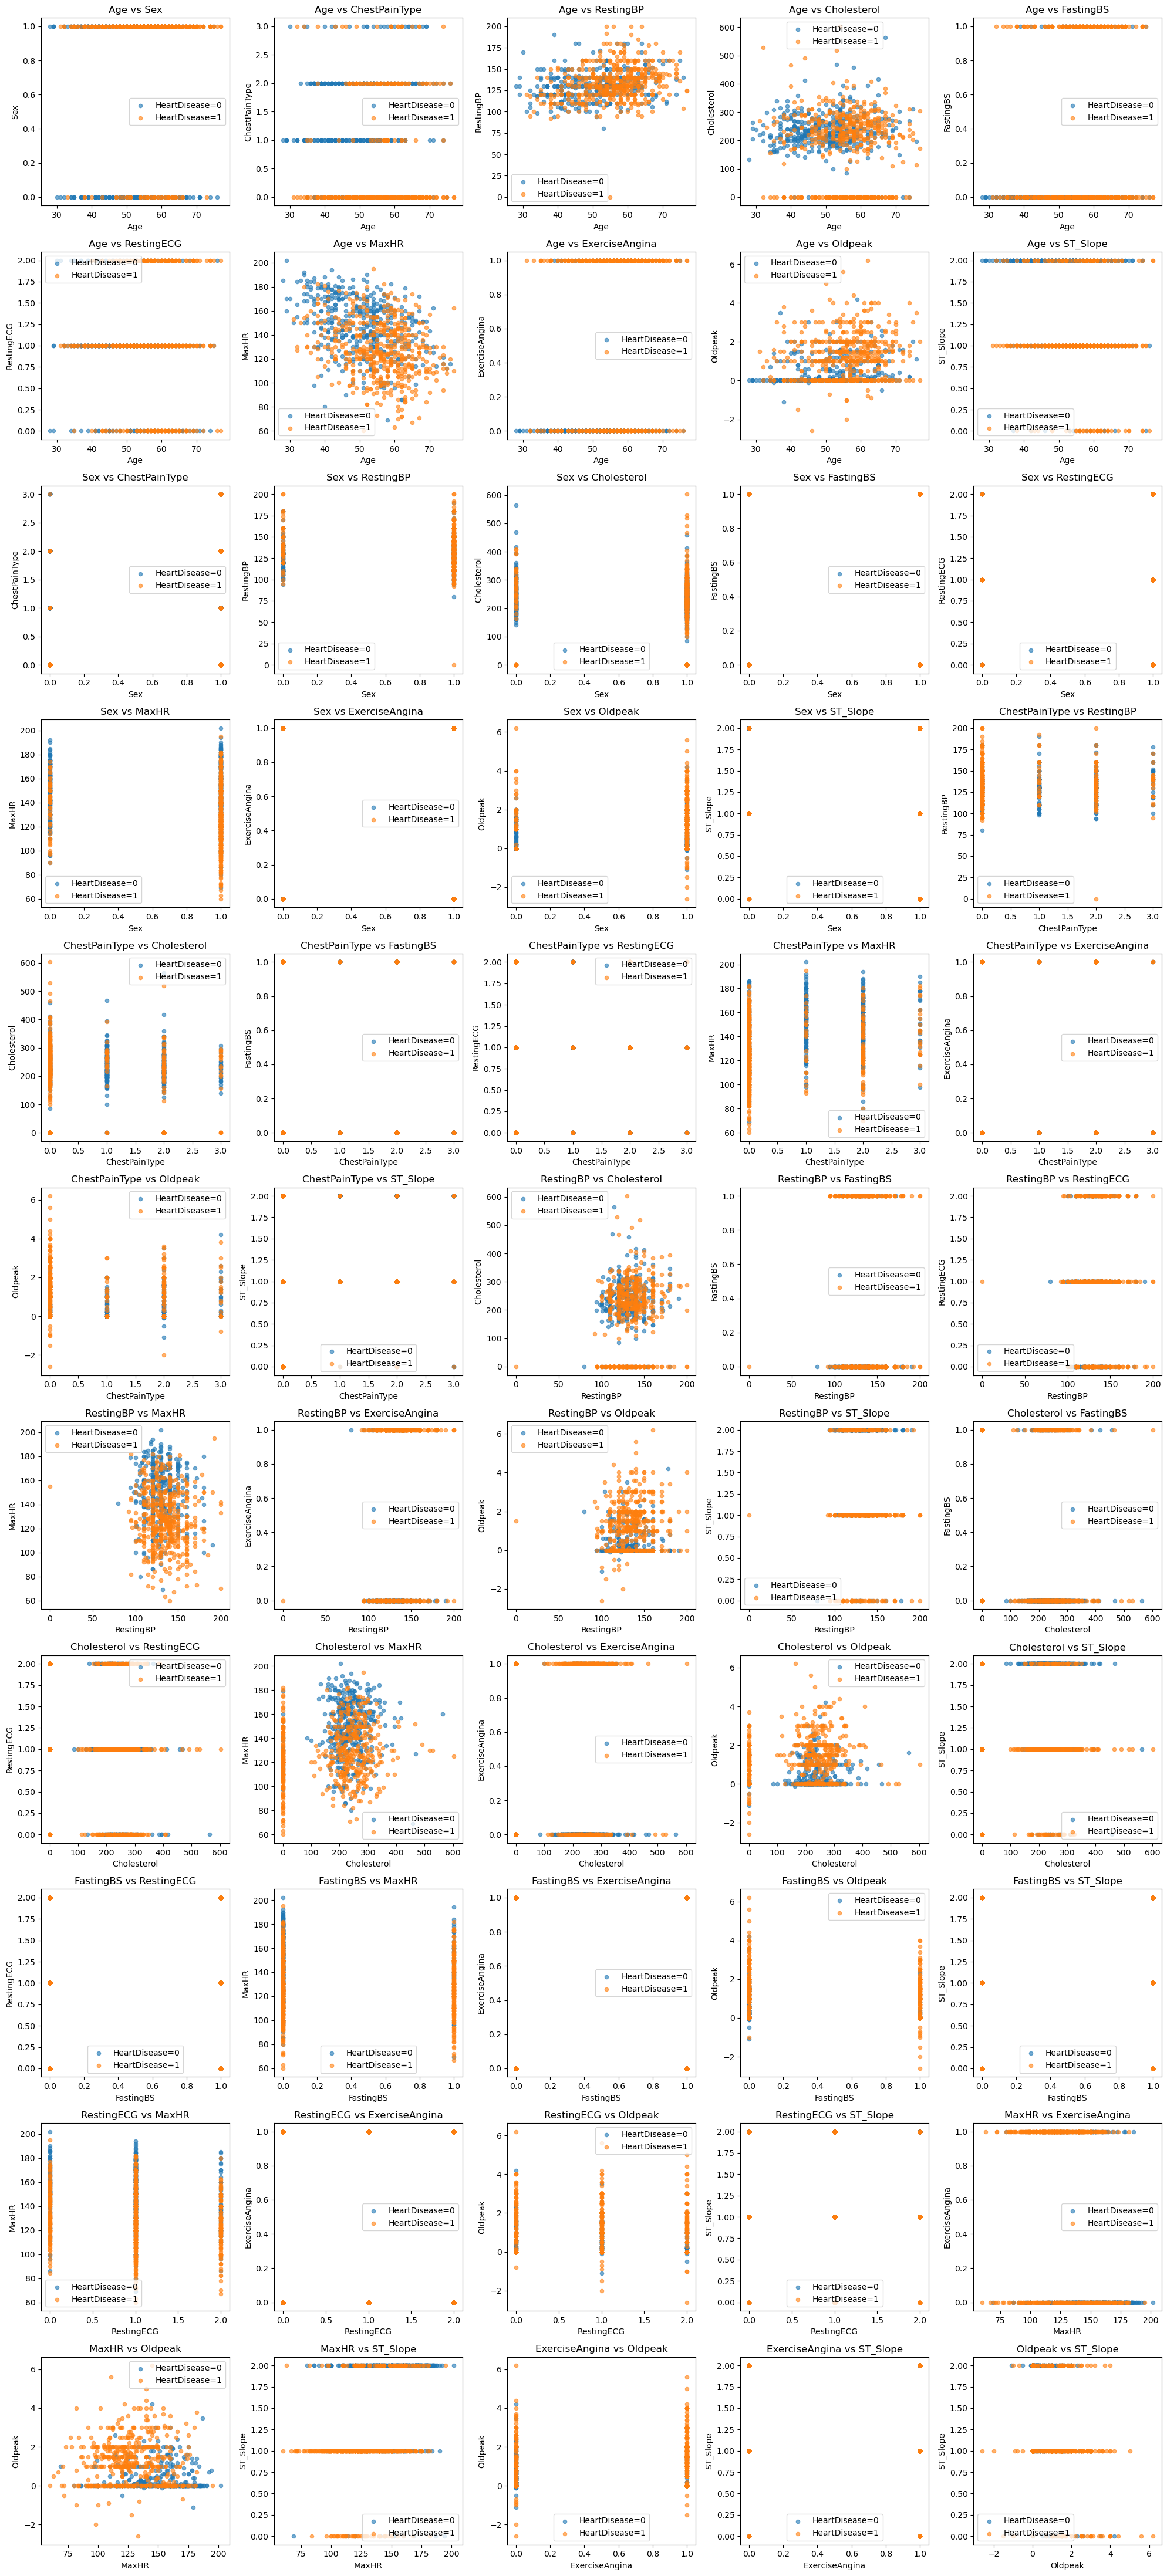

In [89]:
Df=dfle

# Features and target
features = Df.columns[:-1]  # All columns except HeartDisease
target = 'HeartDisease'

# Create a figure for scatter plots
n_features = len(features)
n_plots = n_features * (n_features - 1) // 2  # Number of unique pairs
cols = 5  # Number of columns in the subplot grid
rows = (n_plots + cols - 1) // cols  # Calculate required rows
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()  # Flatten for easier indexing

# Counter for subplot index
plot_idx = 0

# Iterate over all feature pairs
for i in range(n_features):
    for j in range(i + 1, n_features):
        x_feature = features[i]
        y_feature = features[j]
        
        # Scatter plot for this pair
        for label in Df[target].unique():
            mask = Df[target] == label
            axes[plot_idx].scatter(
                Df[mask][x_feature], Df[mask][y_feature],
                label=f'HeartDisease={label}', alpha=0.6, s=20
            )
        
        # Set labels and title
        axes[plot_idx].set_xlabel(x_feature)
        axes[plot_idx].set_ylabel(y_feature)
        axes[plot_idx].set_title(f'{x_feature} vs {y_feature}')
        axes[plot_idx].legend()
        
        plot_idx += 1

# Remove empty subplots
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

In [90]:
dfle.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [91]:
numerical_cols=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']
means=dfle[numerical_cols+['HeartDisease']].groupby('HeartDisease').mean()
print(means)

                    Age       Sex  ChestPainType   RestingBP  Cholesterol  \
HeartDisease                                                                
0             50.551220  0.651220       1.192683  130.180488   227.121951   
1             55.899606  0.901575       0.448819  134.185039   175.940945   

              FastingBS  RestingECG       MaxHR  ExerciseAngina   Oldpeak  \
HeartDisease                                                                
0              0.107317    0.948780  148.151220        0.134146  0.408049   
1              0.334646    1.021654  127.655512        0.622047  1.274213   

              ST_Slope  
HeartDisease            
0             1.739024  
1             1.057087  


In [92]:
cor=df.corr()
cor

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


<Axes: >

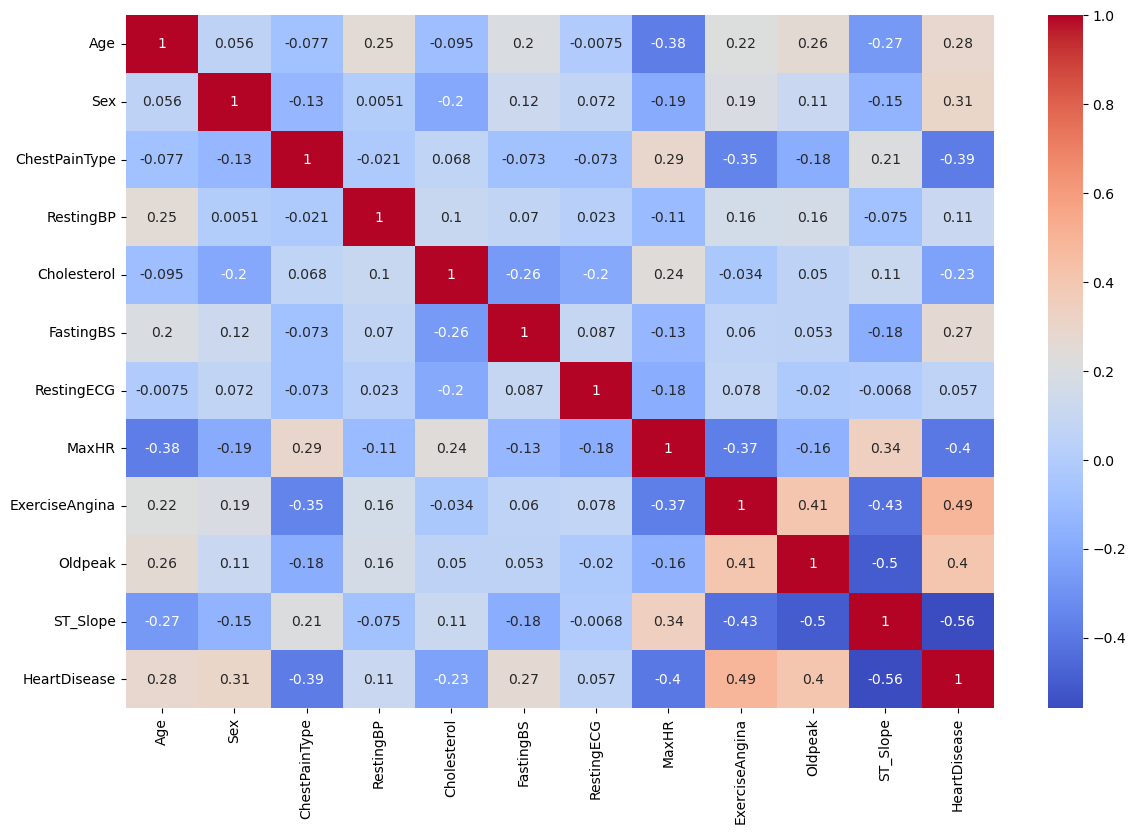

In [93]:
import seaborn as sns
plt.figure(figsize=(14,9))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [94]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


x_train,x_test,y_train,y_test=train_test_split(dfle.drop(['HeartDisease'],axis='columns'),dfle['HeartDisease'],test_size=0.3)


model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8514492753623188

In [95]:
from sklearn import tree

model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.782608695652174

In [96]:

from sklearn.preprocessing import StandardScaler

X=dfle.drop(['HeartDisease'],axis='columns')
y=dfle['HeartDisease']

scale=StandardScaler()
x_scaled=scale.fit_transform(X)
df1=pd.DataFrame(x_scaled,columns=numerical_cols)
df1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078


In [97]:
dataset=pd.concat([df1,y],axis='columns')
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,0.515952,2.321086,-1.210356,0.596393,-0.551341,0.017255,-0.188999,-0.823556,0.293283,-0.596078,1
914,1.536902,0.515952,-0.816995,0.627078,-0.053049,1.813758,0.017255,0.164684,-0.823556,2.357094,-0.596078,1
915,0.370100,0.515952,-0.816995,-0.129513,-0.620168,-0.551341,0.017255,-0.857069,1.214246,0.293283,-0.596078,1
916,0.370100,-1.938163,0.229032,-0.129513,0.340275,-0.551341,-1.566710,1.461525,-0.823556,-0.832432,-0.596078,1


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)



In [99]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8695652173913043

In [100]:
from sklearn.svm import SVC

model=SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8804347826086957

In [101]:
x_scaled.shape

(918, 11)

In [102]:
from sklearn.decomposition import PCA

pca=PCA(n_components=8)
x_pca=pca.fit_transform(X)
x_pca.shape

(918, 8)

In [103]:
df2=pd.DataFrame(x_pca)
df2

,0,1,2,3,4,5,6,7
0,92.310948,29.440927,12.023195,-9.120241,-0.496989,-0.372619,0.129733,0.048479
1,-17.142718,13.751286,31.485800,-5.483985,-0.233918,1.060174,-0.020880,-0.216270
2,81.905498,-38.227446,-16.065126,-21.124485,-1.213693,0.293967,0.838174,0.420150
3,13.654214,-28.749558,-2.731269,-10.147134,0.778393,-0.119355,-0.154889,0.100157
4,-4.347657,-18.085933,13.448181,-3.999748,-1.765007,0.774517,-0.051750,0.357321
...,...,...,...,...,...,...,...,...
913,64.491905,-1.419813,-25.546334,-5.813369,-0.399163,2.377794,0.105082,-0.289169
914,-5.472800,-0.833560,13.807770,13.277218,2.138750,0.108076,0.170521,0.526919
915,-69.004076,-17.337901,-5.338588,0.508244,0.547512,-0.399297,-0.139454,-0.082523
916,39.207459,33.598286,6.122767,9.052761,-0.516429,-0.437837,-0.872944,-0.519546


In [104]:
pca.explained_variance_ratio_

array([9.20218362e-01, 4.91330275e-02, 2.50816697e-02, 5.33062474e-03,
       9.53700717e-05, 5.91900010e-05, 2.86131377e-05, 1.84159368e-05])

In [105]:
x_train_pca,x_test_pca,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.6793478260869565